# Sentiment Analysis with Deep Learning

Mi contribucion a la actividad integradora 3 de la clase de NLP.



## Recoleccion y procesamiento de datos




1- El primer dataset se llama "Large Movie review Dataset", fue publicado por stanford ai y tiene 50k de reviews, para mas información: http://ai.stanford.edu/~amaas/data/sentiment/

Tomado de: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

2- El segundo dataset es un subset del dataset "Sentiment140", el cual fue procesado en la tarea 9, lo guardamos para integrarlo en esta actividad y el cual tiene 400k tweets, para mas información: https://www.kaggle.com/kazanova/sentiment140

Tomado de: https://www.kaggle.com/kazanova/sentiment140

Sube el archivo con tus credenciales de kaggle antes de iniciar.

In [ ]:
! git clone https://github.com/Emile199/SentimentAnalysis-Tensorflow.git

Cloning into 'SentimentAnalysis-Tensorflow'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 28 (delta 5), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [ ]:
! pip install -r /content/SentimentAnalysis-Tensorflow/requirements.txt

     |████████████████████████████████| 167 kB 38.3 MB/s 
     |████████████████████████████████| 393 kB 59.3 MB/s 
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 97% 25.0M/25.7M [00:00<00:00, 59.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 74.1MB/s]


In [ ]:
! unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
data_imdb = pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews.zip')
data_imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data_imdb = (pd.get_dummies(data_imdb,columns=['sentiment'])).drop(columns='sentiment_negative')
data_imdb

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdefcd5d750>]],
      dtype=object)

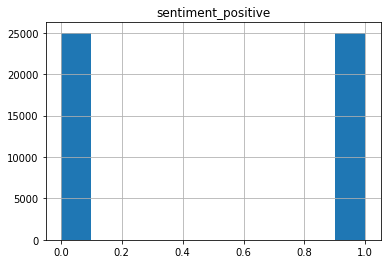

In [ ]:
data_imdb.hist(column='sentiment_positive')

In [ ]:
#Las tomamos de la tarea 9, quitamos las palabras negativas

stopwords_list = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've",
 "you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",
 'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which',
 'who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been',
 'being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or',
 'because','as','until','while','of','at','by','for','with','about','against','between','into','through','during',
 'before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further',
 'then','once','here','there','when','where','why','how','all','any','both','each','few','more','most',
 'other','some','such','only','own','same','so','than','too','very','s','t','can','will',
 'just','don','should',"should've",'now','d','ll','m','o','re','ve','y','ain','br']

stopwords = set(stopwords_list)

In [ ]:
def remove_stopwords(text):
  x = word_tokenize(text)
  filtered_words = [word for word in x if word not in stopwords]
  return " ".join(filtered_words)

def remove_special_characters(text):
  x = re.sub('[^A-Za-z0-9]+', ' ', text)
  return x.lower()

def imdb_cleaning(text):
  x = remove_special_characters(text)
  x = remove_stopwords(x)
  return x

In [ ]:
imdb_cleaning(data_imdb['review'][1])

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen not got polari voices pat truly see seamless editing guided references williams diary entries not well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: imdb_cleaning(x))
data_imdb

,review,sentiment_positive
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job wasn creative ori...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


In [ ]:
#cambiamos los nombre de la columna para concatenar este dataset con sentiment140

data_imdb.columns = ['text','sentiment']
data_imdb.head(5)

,text,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [ ]:
data_s140 = pd.read_csv('/content/SentimentAnalysis-Tensorflow/sentiment140_subset_400k',index_col=0)
data_s140

,target,text
0,0,damn ! ca n't watch soap opera
1,0,IM SO EXHAUSTED
2,0,I allergic reaction eating bagoong.. Damn.. I ...
3,1,My room almost theeeeere . Painting It tomorro...
4,0,50k ? I want cry . ONE 18 external JavaScript ...
...,...,...
399995,0,Anticipating weenie roast announcement morning...
399996,1,cheer buttercup ! Rain go away hearts always m...
399997,1,ive done homework . donno ... maybe 'll okay ....
399998,1,wait tour summer .


In [ ]:
#Cambiamos los nombres de la columna para concatenar
data_s140.columns = ['sentiment','text']
data_s140 = data_s140[['text','sentiment']]
data_s140.head(5)

,text,sentiment
0,damn ! ca n't watch soap opera,0
1,IM SO EXHAUSTED,0
2,I allergic reaction eating bagoong.. Damn.. I ...,0
3,My room almost theeeeere . Painting It tomorro...,1
4,50k ? I want cry . ONE 18 external JavaScript ...,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef9731fd0>]],
      dtype=object)

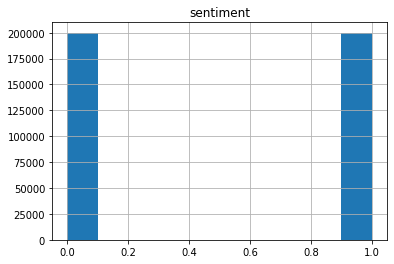

In [ ]:
data_s140.hist(column='sentiment')

In [ ]:
#Ya que vimos que nuestros datasets estan balanceados, los juntamos y los revolvemos
from sklearn.utils import shuffle

data = pd.concat([data_imdb,data_s140])
data = (shuffle(data)).reset_index(drop=True)
data

,text,sentiment
0,"bed time , good day , good weekend , work tomo...",1
1,Mine Yesterday wee sun ...,0
2,Back work . I enjoying time . Good thing 3 day...,0
3,horror movies lot fun low budgets bad acting b...,0
4,must go make lunch get ready work *sigh* anoth...,0
...,...,...
449995,On sugar rush . Two weeks next one Got ta eat ...,1
449996,not easy ! IT IS SO NOT EASY,0
449997,NaN,0
449998,thaaanks jamie ; want chinese food ! ! ! & lt ...,0


In [ ]:
data['text'] = data['text'].apply(lambda x: str(x))

## Creacion del embedding y preparacion de secuencias

Utilizaremos GloVee con vectores de dimension 300

In [ ]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-11-01 05:23:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-01 05:23:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-01 05:23:16--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
#Se tarda
f = open("/content/glove.6B.300d.txt","r")

words = []
vectores = []

for line in f:
  tokens = line.split()
  words.append(tokens[0])
  vectores.append((np.array(tokens[1:])).astype(np.float))


glove300_dict = dict(zip(words,vectores))

f.close()

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
tokenizer = Tokenizer(num_words=None, lower=True)

In [ ]:
corpus = []
for x in range(len(data)):
  corpus.append(data['text'][x])

In [ ]:
tokenizer.fit_on_texts(corpus)

In [ ]:
len(tokenizer.word_index)

182949

In [ ]:
sequences = tokenizer.texts_to_sequences(corpus)

In [ ]:
padded_sequences = pad_sequences(sequences)
padded_sequences

array([[    0,     0,     0, ...,   259, 67940,   945],
       [    0,     0,     0, ...,   538,  3890,   553],
       [    0,     0,     0, ...,    91,    18,   257],
       ...,
       [    0,     0,     0, ...,     0,     0,  1434],
       [    0,     0,     0, ...,  1546,   618,   345],
       [    0,     0,     0, ...,    10,   358,    99]], dtype=int32)

In [ ]:
embedding = np.zeros((len(tokenizer.word_index)+1,300))

for key, value in tokenizer.word_index.items():
  try:
    embedding[value,:] = glove300_dict[key]
  except:
    continue

embedding

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.13292  ,  0.16985  , -0.1436   , ..., -0.23778  ,  0.14766  ,
         0.62902  ],
       [-0.138    , -0.12203  ,  0.0054643, ...,  0.19934  ,  0.057473 ,
        -0.023767 ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [ ]:
embedding.shape

(182950, 300)

In [ ]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = np.array(pd.DataFrame(data['sentiment']))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

## Entrenamiento y creacion de modelos (No hay que correrlo de nuevo)

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [ ]:
#Solo en caso que se este utilizando GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
#Solo en caso que se este utilizando GPU
tf.device('/device:GPU:0')

In [ ]:
#Funcion para graficar la curva de aprendizaje y el accuracy
def graficar_metrica(history,epochs,metrica): #metrica= accuracy o loss
  epoch_nums = range(1,epochs+1)
  training_loss = history.history[metrica]
  validation_loss = history.history["val_"+str(metrica)]
  fig = plt.plot(epoch_nums, training_loss)
  plt.plot(epoch_nums, validation_loss)
  plt.xlabel('epoch')
  plt.ylabel(metrica)
  plt.legend(['training', 'validation'], loc='upper right')
  plt.show()

### Primer Modelo

In [ ]:
model1 = Sequential([
    Embedding((len(tokenizer.word_index))+1, 300, weights=[embedding], trainable=False),
    LSTM(10),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         54885000  
_________________________________________________________________
lstm (LSTM)                  (None, 10)                12440     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 54,897,451
Trainable params: 12,451
Non-trainable params: 54,885,000
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x=X_train, y=y_train, epochs=8, batch_size=100,validation_data=(X_test, y_test))

Epoch 1/8
1540/3600 [===========>..................] - ETA: 21:30 - loss: 0.5319 - accuracy: 0.7364

KeyboardInterrupt: ignored

In [ ]:
model1.save('model1.h5')

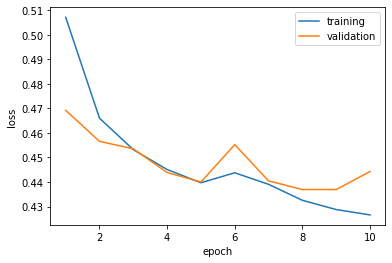

In [ ]:
graficar_metrica(history1,8,'loss')

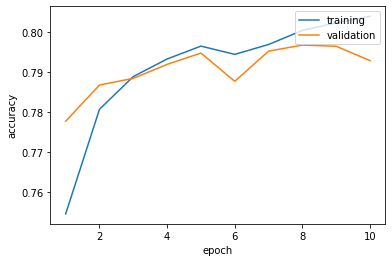

In [ ]:
graficar_metrica(history1,10,'accuracy')

### Modelo 2

In [ ]:
model2 = Sequential([
    Embedding((len(tokenizer.word_index))+1, 300, weights=[embedding], trainable=False),
    Biderectional(LSTM(12)),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [ ]:
model2.summary()

In [ ]:
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x=X_train, y=y_train, epochs=10, batch_size=100,validation_data=(X_test, y_test))

In [ ]:
model2.save('model2.h5')

In [ ]:
graficar_metrica(history2,10,'loss')

In [ ]:
graficar_metrica(history2,10,'accuracy')

### Modelo 3

In [ ]:
model3 = Sequential([
    Embedding((len(tokenizer.word_index))+1, 300, weights=[embedding], trainable=False),
    GRU(12),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         54885000  
_________________________________________________________________
gru (GRU)                    (None, 12)                11304     
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 54,896,317
Trainable params: 11,317
Non-trainable params: 54,885,000
_________________________________________________________________


In [ ]:
model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x=X_train, y=y_train, epochs=10, batch_size=100,validation_data=(X_test, y_test))

Epoch 1/10
3600/3600 [==============================] - 595s 163ms/step - loss: 0.5056 - accuracy: 0.7520 - val_loss: 0.4623 - val_accuracy: 0.7807
Epoch 2/10
3600/3600 [==============================] - 584s 162ms/step - loss: 0.4638 - accuracy: 0.7808 - val_loss: 0.4498 - val_accuracy: 0.7882
Epoch 3/10
3600/3600 [==============================] - 561s 156ms/step - loss: 0.4528 - accuracy: 0.7876 - val_loss: 0.4441 - val_accuracy: 0.7926
Epoch 4/10
3600/3600 [==============================] - 596s 165ms/step - loss: 0.4471 - accuracy: 0.7910 - val_loss: 0.4408 - val_accuracy: 0.7939
Epoch 5/10
  90/3600 [..............................] - ETA: 8:30 - loss: 0.4375 - accuracy: 0.7949

In [ ]:
model3.save('model3.h5')

In [ ]:
graficar_metrica(history3,10,'loss')

In [ ]:
graficar_metrica(history3,10,'accuracy')

## Voting Classifier

Fuentes para seguir investigando:

- https://sailajakarra.medium.com/ensemble-scikit-learn-and-keras-be93206c54c4

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

- https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn

In [ ]:
! gdown --id 1c2opxhofcuWokPkhnFicvj0FqMlCAFzl

Downloading...
From: https://drive.google.com/uc?id=1c2opxhofcuWokPkhnFicvj0FqMlCAFzl
To: /content/modelos.zip
100% 322M/322M [00:02<00:00, 140MB/s]


In [ ]:
! unzip modelos.zip

Archive:  modelos.zip
  inflating: model1.h5               
  inflating: model2.h5               
  inflating: model3.h5               


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model1 = tf.keras.models.load_model('/content/model1.h5')
model2 = tf.keras.models.load_model('/content/model2.h5')
model3 = tf.keras.models.load_model('/content/model3.h5')

In [ ]:
model1.trainable = False
model2.trainable = False
model3.trainable = False

In [ ]:
def modelo1():
  clf = Sequential([model1])
  clf.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
  return clf

def modelo2():
  clf = Sequential([model2])
  clf.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
  return clf

def modelo3():
  clf = Sequential([model3])
  clf.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
  return clf

In [ ]:
model1_sk = KerasClassifier(modelo1,epochs = 0,verbose = 0)
model1_sk._estimator_type = "classifier"
model2_sk = KerasClassifier(modelo2,epochs = 0,verbose = 0)
model2_sk._estimator_type = "classifier"
model3_sk = KerasClassifier(modelo3,epochs = 0,verbose = 0)
model3_sk._estimator_type = "classifier"

In [ ]:
y_test[:10].flatten()

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
X_test[:10]

array([[    0,     0,     0, ...,   144,   164,    30],
       [    0,     0,     0, ...,  1745,   599,   172],
       [    0,     0,     0, ...,  1218,   315,   184],
       ...,
       [    0,     0,     0, ...,    12,    75, 16438],
       [    0,     0,     0, ...,  5067,  4875,  1774],
       [    0,     0,     0, ...,    21,   723,   198]], dtype=int32)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[ ('m1',model1_sk),  ('m2',model2_sk),  ('m3',model3_sk)], voting='soft',flatten_transform=False)

voting_classifier.fit(X_train,y_train.flatten())

voting_classifier.score(X_test[:1000],y_test[:1000])

0.741

In [ ]:
voting_classifier.predict(X_test[:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
model1_sk.fit(X_train,y_train)
model2_sk.fit(X_train,y_train)
model3_sk.fit(X_train,y_train)

## Reporte de metricas

Para el reporte utilizare un subset de 5000 instancias porque si uso el 20% se tarda mucho

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
import cv2
from matplotlib import pyplot as plt

In [ ]:
X_test_sub = X_test[:5000]
y_test_sub = y_test[:5000]

In [ ]:
X_test_sub.shape

(5000, 1448)

### Modelo 1

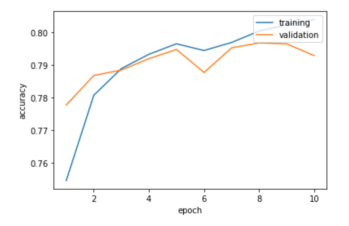

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model1_acc.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

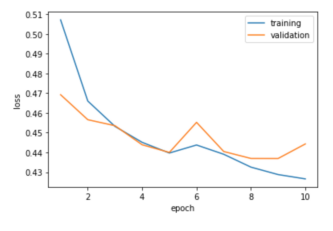

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model1_loss.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

In [ ]:
model1_predictions = model1_sk.predict(X_test_sub)

In [ ]:
print('Accuracy: '+str(accuracy_score(model1_predictions,y_test_sub)))
print('F1 score: '+str(f1_score(model1_predictions,y_test_sub)))
print('Recall: '+str(recall_score(model1_predictions,y_test_sub)))
print('Precision: '+str(precision_score(model1_predictions,y_test_sub)))

Accuracy: 0.7466
F1 score: 0.7474586406218855
Recall: 0.740521327014218
Precision: 0.7545271629778671


### Modelo 2

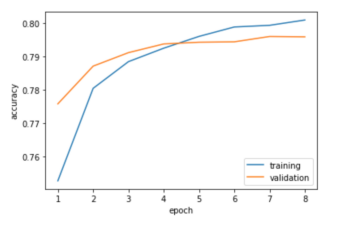

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model2_acc.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

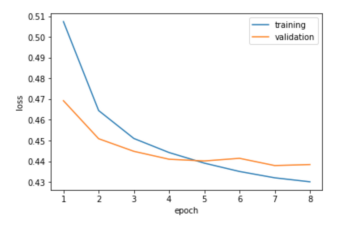

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model2_loss.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

In [ ]:
model2_predictions = model2_sk.predict(X_test_sub)

In [ ]:
print('Accuracy: '+str(accuracy_score(model2_predictions,y_test_sub)))
print('F1 score: '+str(f1_score(model2_predictions,y_test_sub)))
print('Recall: '+str(recall_score(model2_predictions,y_test_sub)))
print('Precision: '+str(precision_score(model2_predictions,y_test_sub)))

Accuracy: 0.7466
F1 score: 0.7474586406218855
Recall: 0.740521327014218
Precision: 0.7545271629778671


### Modelo 3

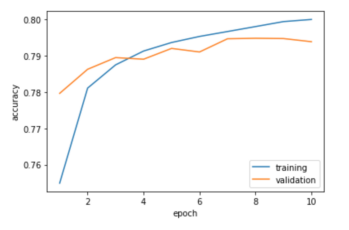

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model3_acc.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

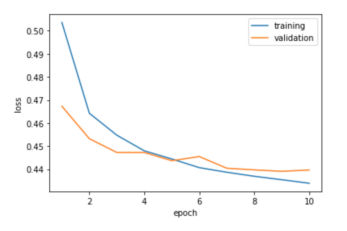

In [ ]:
img = cv2.imread("/content/SentimentAnalysis-Tensorflow/Imagenes/Model3_loss.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis("off")
plt.show()

In [ ]:
model3_predictions = model3_sk.predict(X_test_sub)

In [ ]:
print('Accuracy: '+str(accuracy_score(model3_predictions,y_test_sub)))
print('F1 score: '+str(f1_score(model3_predictions,y_test_sub)))
print('Recall: '+str(recall_score(model3_predictions,y_test_sub)))
print('Precision: '+str(precision_score(model3_predictions,y_test_sub)))

Accuracy: 0.7566
F1 score: 0.7576180043815973
Recall: 0.75
Precision: 0.7653923541247485


### Voting Classifier

In [ ]:
vclass_predictions = voting_classifier.predict(X_test_sub)

In [ ]:
print('Accuracy: '+str(accuracy_score(vclass_predictions,y_test_sub)))
print('F1 score: '+str(f1_score(vclass_predictions,y_test_sub)))
print('Recall: '+str(recall_score(vclass_predictions,y_test_sub)))
print('Precision: '+str(precision_score(vclass_predictions,y_test_sub)))

Accuracy: 0.7618
F1 score: 0.7634558093346574
Recall: 0.7537254901960785
Precision: 0.7734406438631791
